In [1]:
from IPython.display import clear_output
from time import sleep
import numpy as np
import math
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import random
mapache = misc.face()
div_vertical = 4
div_horizontal = 4
objetivo = None
for vertical in np.vsplit(mapache, div_vertical):
    if objetivo is None:
        objetivo = np.array(np.hsplit(vertical, div_horizontal))
        print(objetivo.shape)
    else:
        objetivo = np.vstack([objetivo, np.hsplit(vertical, div_horizontal)])
        print(objetivo.shape)
    

objetivo = objetivo.reshape([div_vertical,div_horizontal, objetivo.shape[1], objetivo.shape[2], 3])
vertical1, vertical2, vertical3, vertical4 = np.vsplit(mapache,div_vertical)
objetivo2 = np.array([np.hsplit(vertical1,div_horizontal), np.hsplit(vertical2,div_horizontal),np.hsplit(vertical3,div_horizontal),np.hsplit(vertical4,div_horizontal)])

if np.array_equal(objetivo,objetivo2):
    print("Son iguales")
else:
    print("No son iguales")
    print(objetivo.shape)
    print(objetivo2.shape)

(4, 192, 256, 3)
(8, 192, 256, 3)
(12, 192, 256, 3)
(16, 192, 256, 3)
Son iguales


In [3]:
from IPython.display import clear_output
from time import sleep
import numpy as np
import math
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import random

imagen = misc.face()
class Rompecabezas:
    __objetivo = None
    __imagen_actual = None
    __division_horizontal = None
    __division_vertical = None
    def __init__(self, division_vertical, division_horizontal):
        self.__division_vertical = division_vertical
        self.__division_horizontal = division_horizontal
        self.__crear_piezas()
        self.__imagen_actual = np.zeros_like(self.__objetivo) 
        self.__crear_rompecabezas()
        self.__jugar()
    
    def __crear_piezas(self):
        global imagen
        objetivo = None
        for vertical in np.vsplit(imagen, self.__division_vertical):
            if objetivo is None:
                objetivo = np.array(np.hsplit(vertical, self.__division_horizontal))
            else:
                objetivo = np.vstack([objetivo, np.hsplit(vertical, self.__division_horizontal)])
        objetivo = objetivo.reshape([self.__division_vertical,self.__division_horizontal, objetivo.shape[1], objetivo.shape[2], 3])
        self.__objetivo = objetivo.copy()

    def __crear_rompecabezas(self):
        cantidad_piezas = self.__division_horizontal * self.__division_vertical
        if cantidad_piezas == 2:
            posiciones_iniciales = [1, 0]
        else:
            posiciones_iniciales = random.sample(range(cantidad_piezas), cantidad_piezas)
        contador = 0
        for posicion in posiciones_iniciales:
            self.__imagen_actual[int(contador/self.__division_horizontal), contador%self.__division_horizontal] = self.__objetivo[int(posicion/self.__division_horizontal), posicion%self.__division_horizontal,:,:,:]
            contador = contador + 1

    def __intercambio(self, origen, destino):
        auxiliar = np.copy(self.__imagen_actual[int(origen/self.__division_horizontal), origen%self.__division_horizontal])
        self.__imagen_actual[int(origen/self.__division_horizontal), origen%self.__division_horizontal] = self.__imagen_actual[int(destino/self.__division_horizontal), destino%self.__division_horizontal]
        self.__imagen_actual[int(destino/self.__division_horizontal), destino%self.__division_horizontal] = np.copy(auxiliar)

        
    def __dibujar(self):
        global imagen
        nuevo = None
        for filas in range(self.__division_vertical):
            if nuevo is None:
                nuevo = np.array(np.hstack(self.__imagen_actual[filas,:,:,:,:])) 
            else:
                nuevo = np.vstack([nuevo ,np.hstack(self.__imagen_actual[filas,:,:,:,:])])
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,15))
        
        axes[0].set_title("Rompecabezas Actual")
        axes[1].set_title("Imagen Objetivo")
        axes[0].imshow(nuevo)
        axes[1].imshow(imagen)
        fig.tight_layout()
        
        
    def __jugar(self):
        mensaje_error = ""
        while True:
            clear_output()
            hay_mensaje_error = mensaje_error != ""
            if hay_mensaje_error:
                print(mensaje_error)
            mensaje_error = ""
            self.__dibujar()
            plt.pause(0.005)
            try:
                origen = int(input("Ingrese el índice origen del intercambio: "))
                destino = int(input("Ingrese el índice destino del intercambio: "))        
            except Exception:
                mensaje_error = "Ingrese un número correcto"
                continue
            indices_exceden_cantidad_piezas = origen<0 or origen>15 or destino>15 or destino<0
            if indices_exceden_cantidad_piezas:
                    mensaje_error = "Un valor ingresado excede la cantidad de piezas del rompecabezas"
            else:
                    self.__intercambio(origen,destino)
            ha_ganado = np.array_equal(self.__imagen_actual, self.__objetivo) 
            if ha_ganado:
                break
        clear_output()
        print("Felicitaciones, has completado el rompecabezas")
        self.__dibujar()
                            
class Juego:                 
    def __init__(self):
        global imagen
        while True:
            try:
                horizontal = int(input("Ingrese la division en la horizontal: "))
                vertical = int(input("Ingrese la division en la vertical: "))
                np.vsplit(imagen, vertical)
                np.hsplit(imagen, horizontal)
            except Exception as e:
                print("No se puede realizar el rompecabezas con esas divisiones")
                continue
            es_uno_por_uno = vertical == 1 and horizontal == 1 
            if es_uno_por_uno:
                print("No se puede realizar el rompecabezas con esas divisiones")
            else:
                break 
        rompecabezas = Rompecabezas(vertical, horizontal)
            

# Bienvenido al juego de Rompecabezas
## El objetivo es armar el rompecabezas intercambiado las piezas mal ubicadas
### El juego inicia pidiéndole las divisiones horizontales y verticales para hacer el rompecabezas
### Al empezar con el rompecabezas se le pedirá indicar dos piezas para ser intercambiadas. 
#### La numeración de las piezas empieza desde arriba a la izquierda, aumentando uno hacia la derecha y empezando desde cero
### Por ejemplo, así
|  0 |  1 | 2  | 3  |
|----|----|----|----|
|  4 |  5 | 6  | 7  |
|  8 |  9 | 10 | 11 |
| 12 | 13 | 14 | 15 |

### Para empezar a jugar ejecute la celda debajo

Felicitaciones, has completado el rompecabezas


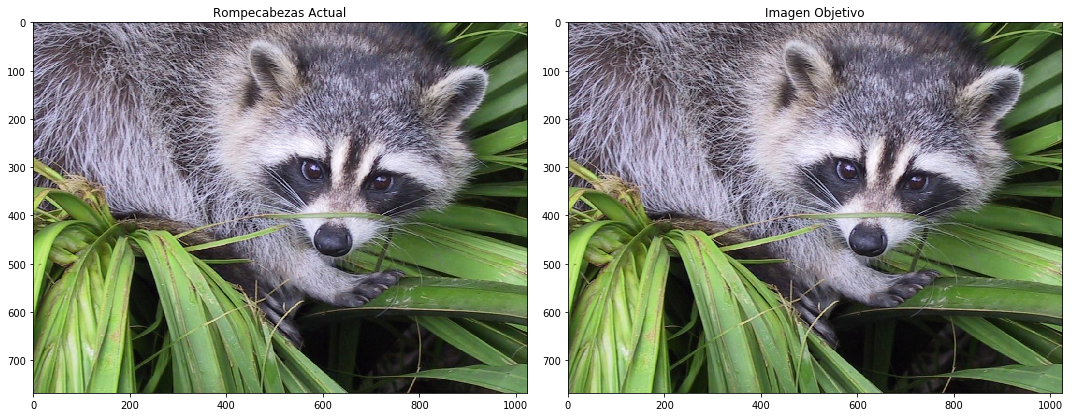

In [4]:
#rompecabezas = Rompecabezas()
juego = Juego()